## zad.1
Uruchomić 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mnożenie BLAS w Julii (`A*B`) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie.

In [80]:
using Polynomials, Plots, DataFrames, Statistics, CSV, LinearAlgebra, TaylorSeries

In [21]:
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [22]:
function naive_time(A, B)
    @elapsed naive_multiplication(A, B)
end

function better_time(A, B)
    @elapsed better_multiplication(A, B)
end

function blas_time(A, B)
    @elapsed A * B
end

blas_time (generic function with 1 method)

In [25]:
dfj = DataFrame(n = Int64[], method = String[], time = Float64[])

,n,method,time
,Int64,String,Float64


In [19]:
jump = 50
treadmill = jump:jump:10*jump

50:50:500

In [26]:
for i in treadmill
    for j in 1:10
        A = rand(i, i)
        B = rand(i, i)
        push!(dfj, [i "naive" naive_time(A, B)])
        push!(dfj, [i "better" better_time(A, B)])
        push!(dfj, [i "blas" blas_time(A, B)])
    end
end
dfj

,n,method,time
,Int64,String,Float64
1,50,naive,0.0002553
2,50,better,0.0001274
3,50,blas,2.5e-5
4,50,naive,0.0002657
5,50,better,0.0001257
6,50,blas,1.96e-5
7,50,naive,0.0002625
8,50,better,0.0001215
9,50,blas,1.42e-5


In [27]:
dfj_grouped = groupby(dfj, [:n, :method])

,n,method,time
,Int64,String,Float64
1,50,naive,0.0002553
2,50,naive,0.0002657
3,50,naive,0.0002625
4,50,naive,0.0002666
5,50,naive,0.0002622
6,50,naive,0.0002603
7,50,naive,0.0002608
8,50,naive,0.0002602
9,50,naive,0.0002589


In [28]:
dfj_combined = combine(dfj_grouped, "time" => mean, "time" => std)

,n,method,time_mean,time_std
,Int64,String,Float64,Float64
1,50,naive,0.00026113,3.33135e-6
2,50,better,0.00013572,2.0642e-5
3,50,blas,1.744e-5,3.93452e-6
4,100,naive,0.00244139,6.25507e-5
5,100,better,0.00100034,2.51224e-5
6,100,blas,0.00047109,0.000103611
7,150,naive,0.00865675,0.000187359
8,150,better,0.00322214,3.9662e-5
9,150,blas,0.00045376,0.000113208


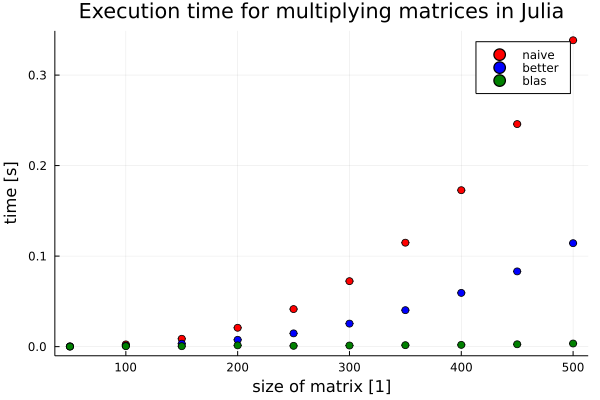

In [29]:
scatter([dfj_combined[dfj_combined[:,2] .== "naive", :].n dfj_combined[dfj_combined[:,2] .== "better", :].n dfj_combined[dfj_combined[:,2] .== "blas", :].n],
    [dfj_combined[dfj_combined[:,2] .== "naive", :].time_mean dfj_combined[dfj_combined[:,2] .== "better", :].time_mean dfj_combined[dfj_combined[:,2] .== "blas", :].time_mean],
    colour = [:red :blue :green],
    yerr = dfj_combined.time_std,
    label = ["naive" "better" "blas"],
    title = "Execution time for multiplying matrices in Julia",
    xlab = "size of matrix [1]",
    ylab = "time [s]"
)

## zad.2
Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną wersję za pomocą zamiany pętli metodę mnożenia macierzy(wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1. (osobno niż p.1).
    
    *(Dla chętnych)* sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. 

```c
#include <stdio.h>
#include <stdlib.h>
#include <gsl/gsl_blas.h>
#include <float.h>
#include <sys/times.h>
#include <unistd.h>


int digs = DECIMAL_DIG;
clock_t start_time, end_time;
struct tms start_tms, end_tms;


void start_the_time() {
  start_time = times(&start_tms);
}


void end_the_time() {
  end_time = times(&end_tms);
}


double get_time() {
  int ticks_per_sec = sysconf(_SC_CLK_TCK);
  return (double) (end_time - start_time) / ticks_per_sec;
}


void naive_multiply(double** A, double** B, double** C, int n){
    for (int i = 0; i < n; i++)
        for (int j = 0; j < n; j++)
            for (int k = 0; k < n; k++)
                C[i][j] += A[i][k]*B[k][j];
}


void better_multiply(double** A, double** B, double** C, int n){
    for (int i = 0; i < n; i++)
        for (int k = 0; k < n; k++)
            for (int j = 0; j < n; j++)
                C[i][j] += A[i][k]*B[k][j];
}


void free_matrix(double** M, int n) {
    for (int i = 0; i < n; i++) {
        free(M[i]);
    }
    free(M);
}


double** random_matrix(int n) {
    double** M = malloc(n * sizeof(double*));
    for (int i = 0; i < n; i++) {
        M[i] = malloc(n * sizeof(double));
        for (int j = 0; j < n; j++) {
            M[i][j]  = (double) rand() / (double) ((unsigned) (RAND_MAX) + 1);
        }
    }
    return M;
}


double** zeros(int n) {
    double** M = malloc(n * sizeof(double*));
    for (int i = 0; i < n; i++) {
        M[i] = malloc(n * sizeof(double));
        for (int j = 0; j < n; j++) {
            M[i][j]  = 0.0;
        }
    }
    return M;
}


gsl_matrix* random_gsl(int n) {
    gsl_matrix* M = gsl_matrix_alloc(n, n);
    for (int i = 0; i < n; i++) {
        for (int j = 0; j < n; j++) {
            gsl_matrix_set(M, i, j, (double) rand() / (double) ((unsigned) (RAND_MAX) + 1));
        }
    }
    return M;
}


gsl_matrix* zeros_gsl(int n) {
    gsl_matrix* M = gsl_matrix_calloc(n, n);
    return M;
}


int main() {
    char* file_name = "data.csv";
    FILE* file = fopen(file_name, "w");

    int first = 100;
    int jump = 100;
    int last = 1001;

    fprintf(file, "n,method,time");
    double time;

    for (int i = first; i < last; i += jump) {
        for (int j = 0; j < 10; j++) {
            double** A = random_matrix(i);
            double** B = random_matrix(i);
            double** C = zeros(i);

            start_the_time();
            naive_multiply(A, B, C, i);
            end_the_time();
            time = get_time();
            fprintf(file, "\n%d,%s,%.*e", i, "naive", digs, time);

            free_matrix(C, i);
            C = zeros(i);

            start_the_time();
            better_multiply(A, B, C, i);
            end_the_time();
            time = get_time();
            fprintf(file, "\n%d,%s,%.*e", i, "better", digs, time);

            free_matrix(A, i);
            free_matrix(B, i);
            free_matrix(C, i);

            gsl_matrix* a = random_gsl(i);
            gsl_matrix* b = random_gsl(i);
            gsl_matrix* c = zeros_gsl(i);
            start_the_time();
            gsl_blas_dgemm(CblasNoTrans, CblasNoTrans, 1.0, a, b, 0.0, c);
            end_the_time();
            time = get_time();
            fprintf(file, "\n%d,%s,%.*e", i, "blas", digs, time);

            gsl_matrix_free(a);
            gsl_matrix_free(b);
            gsl_matrix_free(c);
        }
    }

    fclose(file);

    return 0;
}
```

In [30]:
dfO2 = CSV.read("dataO2.csv", delim=",", DataFrame)
dfOfast = CSV.read("dataOfast.csv", delim=",", DataFrame)
dfc = CSV.read("data.csv", delim=",", DataFrame)

,n,method,time
,Int64,String7,Float64
1,100,naive,0.0
2,100,better,0.01
3,100,blas,0.0
4,100,naive,0.0
5,100,better,0.0
6,100,blas,0.01
7,100,naive,0.0
8,100,better,0.0
9,100,blas,0.0


In [31]:
dfO2_grouped = groupby(dfO2, [:n, :method])
dfOfast_grouped = groupby(dfOfast, [:n, :method])
dfc_grouped = groupby(dfc, [:n, :method])

,n,method,time
,Int64,String7,Float64
1,100,naive,0.02
2,100,naive,0.01
3,100,naive,0.01
4,100,naive,0.02
5,100,naive,0.01
6,100,naive,0.01
7,100,naive,0.01
8,100,naive,0.02
9,100,naive,0.01


In [32]:
dfO2_combined = combine(dfO2_grouped, "time" => mean, "time" => std)
dfOfast_combined = combine(dfOfast_grouped, "time" => mean, "time" => std)
dfc_combined = combine(dfc_grouped, "time" => mean, "time" => std)

,n,method,time_mean,time_std
,Int64,String7,Float64,Float64
1,100,naive,0.013,0.00483046
2,100,better,0.012,0.00421637
3,100,blas,0.001,0.00316228
4,200,naive,0.096,0.00516398
5,200,better,0.097,0.00483046
6,200,blas,0.008,0.00421637
7,300,naive,0.336,0.00699206
8,300,better,0.322,0.00421637
9,300,blas,0.029,0.00316228


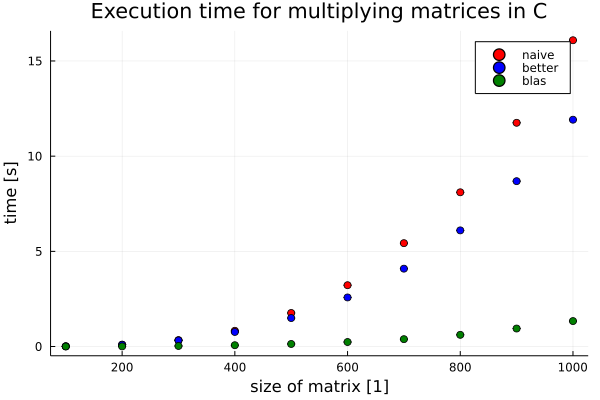

In [33]:
scatter([dfc_combined[dfc_combined[:,2] .== "naive", :].n dfc_combined[dfc_combined[:,2] .== "better", :].n dfc_combined[dfc_combined[:,2] .== "blas", :].n],
    [dfc_combined[dfc_combined[:,2] .== "naive", :].time_mean dfc_combined[dfc_combined[:,2] .== "better", :].time_mean dfc_combined[dfc_combined[:,2] .== "blas", :].time_mean],
    colour = [:red :blue :green],
    yerr = dfc_combined.time_std,
    label = ["naive" "better" "blas"],
    title = "Execution time for multiplying matrices in C",
    xlab = "size of matrix [1]",
    ylab = "time [s]"
)

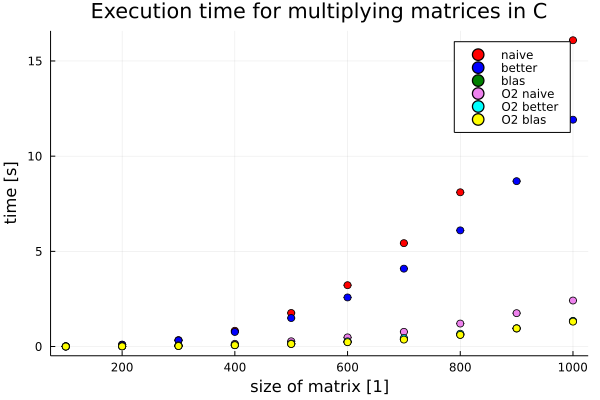

In [34]:
scatter!([dfO2_combined[dfO2_combined[:,2] .== "naive", :].n dfO2_combined[dfO2_combined[:,2] .== "better", :].n dfO2_combined[dfO2_combined[:,2] .== "blas", :].n],
    [dfO2_combined[dfO2_combined[:,2] .== "naive", :].time_mean dfO2_combined[dfO2_combined[:,2] .== "better", :].time_mean dfO2_combined[dfO2_combined[:,2] .== "blas", :].time_mean],
    colour = [:violet :cyan :yellow],
    yerr = dfO2_combined.time_std,
    label = ["O2 naive" "O2 better" "O2 blas"],
    title = "Execution time for multiplying matrices in C",
    xlab = "size of matrix [1]",
    ylab = "time [s]"
)

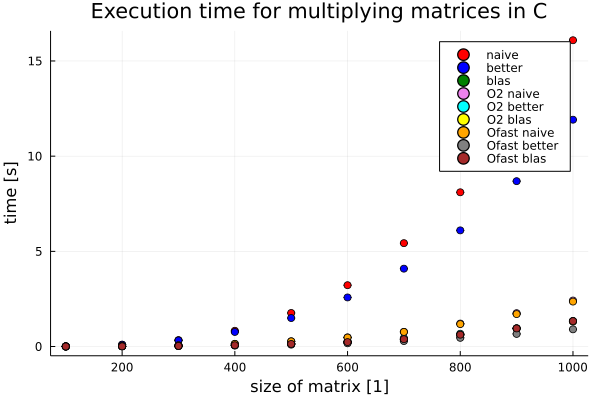

In [35]:
scatter!([dfOfast_combined[dfOfast_combined[:,2] .== "naive", :].n dfOfast_combined[dfOfast_combined[:,2] .== "better", :].n dfOfast_combined[dfOfast_combined[:,2] .== "blas", :].n],
    [dfOfast_combined[dfOfast_combined[:,2] .== "naive", :].time_mean dfOfast_combined[dfOfast_combined[:,2] .== "better", :].time_mean dfOfast_combined[dfOfast_combined[:,2] .== "blas", :].time_mean],
    colour = [:orange :grey :brown],
    yerr = dfOfast_combined.time_std,
    label = ["Ofast naive" "Ofast better" "Ofast blas"],
    title = "Execution time for multiplying matrices in C",
    xlab = "size of matrix [1]",
    ylab = "time [s]"
)

## zad.3
Użyć funkcji `polyfit` z pakietu  Polynomials do znalezienia odpowiednich wielomianów, które najlepiej pasują do zależności czasowych każdego z algorytmów. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianów do wcześniejszych wykresów.

In [42]:
x_j = dfj_combined[dfj_combined[:,2] .== "naive", :].n
y_j_naive = dfj_combined[dfj_combined[:,2] .== "naive", :].time_mean
y_j_better = dfj_combined[dfj_combined[:,2] .== "better", :].time_mean
y_j_blas = dfj_combined[dfj_combined[:,2] .== "blas", :].time_mean

10-element Vector{Float64}:
 1.744e-5
 0.00047109000000000007
 0.00045376
 0.0013853000000000001
 0.0008512000000000001
 0.0012080200000000002
 0.0015844599999999998
 0.00190952
 0.0025786200000000002
 0.0034170399999999997

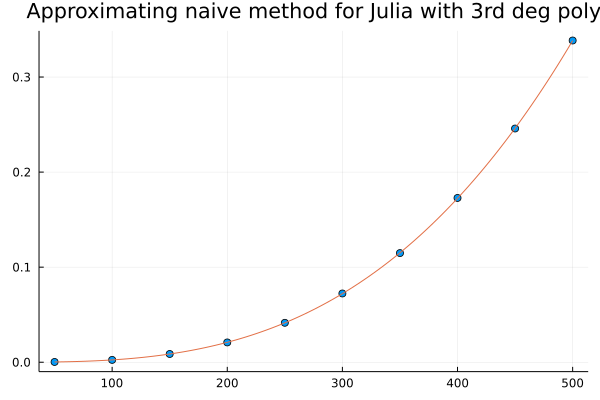

In [45]:
scatter(x_j, y_j_naive, label="")
polyfit_j_naive = fit(x_j, y_j_naive, 3)
plot!(polyfit_j_naive, extrema(x_j)..., label="",
    title="Approximating naive method for Julia with 3rd deg poly")

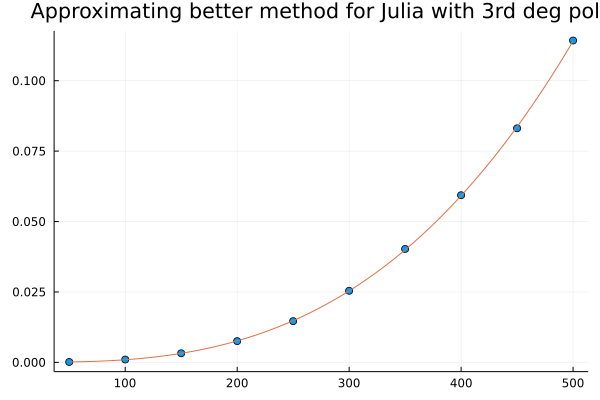

In [46]:
scatter(x_j, y_j_better, label="")
polyfit_j_better = fit(x_j, y_j_better, 3)
plot!(polyfit_j_better, extrema(x_j)..., label="",
    title="Approximating better method for Julia with 3rd deg poly")

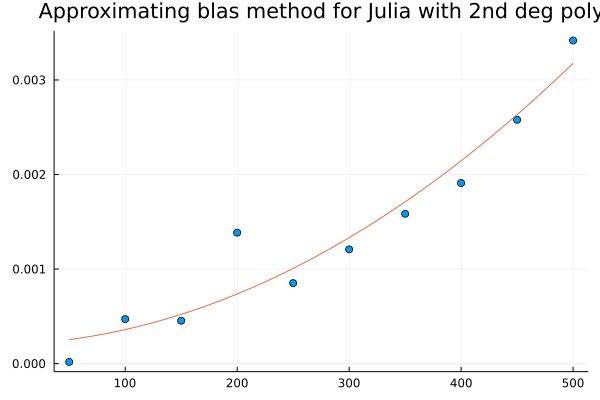

In [47]:
scatter(x_j, y_j_blas, label="")
polyfit_j_blas = fit(x_j, y_j_blas, 2)
plot!(polyfit_j_blas, extrema(x_j)..., label="",
    title="Approximating blas method for Julia with 2nd deg poly")

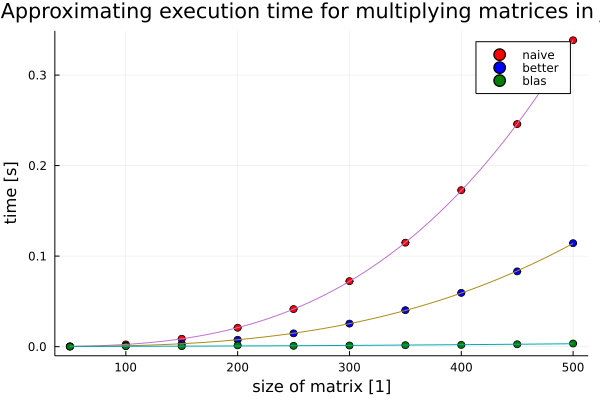

In [48]:
scatter([dfj_combined[dfj_combined[:,2] .== "naive", :].n dfj_combined[dfj_combined[:,2] .== "better", :].n dfj_combined[dfj_combined[:,2] .== "blas", :].n],
    [dfj_combined[dfj_combined[:,2] .== "naive", :].time_mean dfj_combined[dfj_combined[:,2] .== "better", :].time_mean dfj_combined[dfj_combined[:,2] .== "blas", :].time_mean],
    colour = [:red :blue :green],
    yerr = dfj_combined.time_std,
    label = ["naive" "better" "blas"],
    title = "Approximating execution time for multiplying matrices in Julia",
    xlab = "size of matrix [1]",
    ylab = "time [s]"
)
plot!(polyfit_j_naive, extrema(x_j)..., label="")
plot!(polyfit_j_better, extrema(x_j)..., label="")
plot!(polyfit_j_blas, extrema(x_j)..., label="")

In [49]:
x_c = dfc_combined[dfc_combined[:,2] .== "naive", :].n
y_c_naive = dfc_combined[dfc_combined[:,2] .== "naive", :].time_mean
y_c_better = dfc_combined[dfc_combined[:,2] .== "better", :].time_mean
y_c_blas = dfc_combined[dfc_combined[:,2] .== "blas", :].time_mean

10-element Vector{Float64}:
 0.001
 0.008
 0.029000000000000005
 0.06900000000000002
 0.13400000000000004
 0.23699999999999996
 0.387
 0.6140000000000001
 0.945
 1.3370000000000002

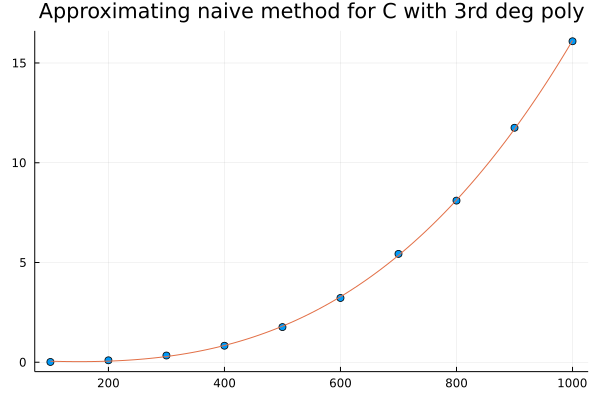

In [50]:
scatter(x_c, y_c_naive, label="")
polyfit_c_naive = fit(x_c, y_c_naive, 3)
plot!(polyfit_c_naive, extrema(x_c)..., label="",
    title="Approximating naive method for C with 3rd deg poly")

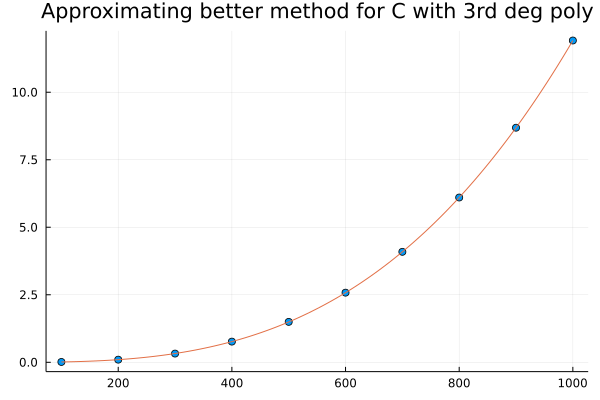

In [51]:
scatter(x_c, y_c_better, label="")
polyfit_c_better = fit(x_c, y_c_better, 3)
plot!(polyfit_c_better, extrema(x_c)..., label="",
    title="Approximating better method for C with 3rd deg poly")

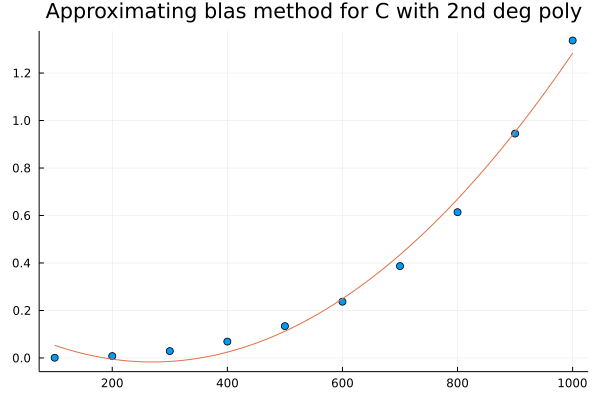

In [52]:
scatter(x_c, y_c_blas, label="")
polyfit_c_blas = fit(x_c, y_c_blas, 2)
plot!(polyfit_c_blas, extrema(x_c)..., label="",
    title="Approximating blas method for C with 2nd deg poly")

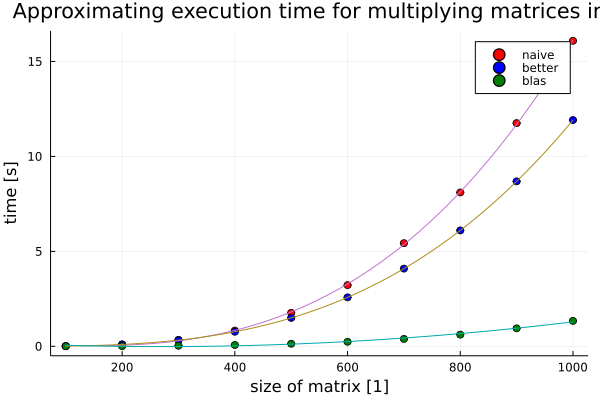

In [54]:
scatter([dfc_combined[dfc_combined[:,2] .== "naive", :].n dfc_combined[dfc_combined[:,2] .== "better", :].n dfc_combined[dfc_combined[:,2] .== "blas", :].n],
    [dfc_combined[dfc_combined[:,2] .== "naive", :].time_mean dfc_combined[dfc_combined[:,2] .== "better", :].time_mean dfc_combined[dfc_combined[:,2] .== "blas", :].time_mean],
    colour = [:red :blue :green],
    yerr = dfc_combined.time_std,
    label = ["naive" "better" "blas"],
    title = "Approximating execution time for multiplying matrices in C",
    xlab = "size of matrix [1]",
    ylab = "time [s]"
)
plot!(polyfit_c_naive, extrema(x_c)..., label="")
plot!(polyfit_c_better, extrema(x_c)..., label="")
plot!(polyfit_c_blas, extrema(x_c)..., label="")

## zad.4
Pokazać zniwelowanie efektu Rungego (przy interpolacji) poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Narysować wybraną funkcję z zaznaczonymi węzłami i wielomianem interpolacyjnym dla węzłów równoodległych oraz Czebyszewa (2 wykresy).

In [56]:
f(x) = 1 / (1 + x^4)

f (generic function with 1 method)

In [57]:
X = -5:1:5
Y = [f(x) for x in X]

11-element Vector{Float64}:
 0.001597444089456869
 0.0038910505836575876
 0.012195121951219513
 0.058823529411764705
 0.5
 1.0
 0.5
 0.058823529411764705
 0.012195121951219513
 0.0038910505836575876
 0.001597444089456869

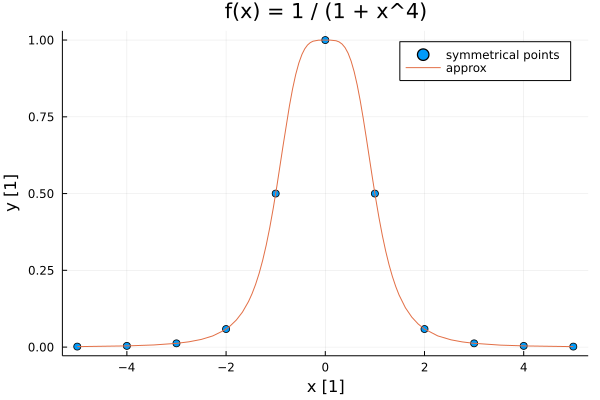

In [74]:
scatter(X, Y, label="symmetrical points", title="f(x) = 1 / (1 + x^4)", xlabel="x [1]", ylabel="y [1]")
plot!(f,  extrema(X)..., label="approx")

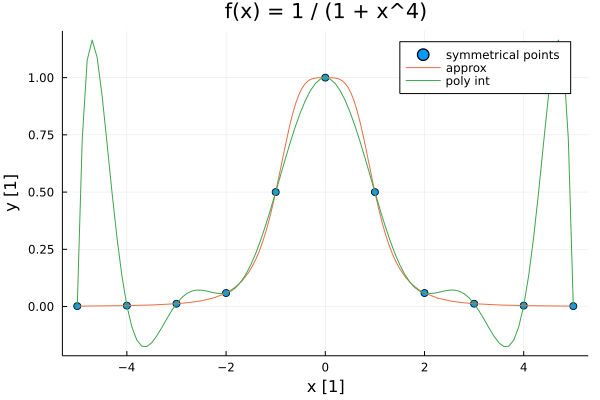

In [75]:
poly_fit = fit(X, Y)
plot!(poly_fit, extrema(X)..., label="poly int")

In [67]:
chebyshev_base = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
chebyshev_poly = ChebyshevT(chebyshev_base)
X_chebyshev = 5 * Polynomials.roots(chebyshev_poly)
Y_chebyshev = [f(x) for x in X_chebyshev]

10-element Vector{Float64}:
 0.0016784589203126597
 0.0025321844527311102
 0.006359300476947392
 0.03629743515709617
 0.7276477472334709
 0.7276477472334706
 0.03629743515709604
 0.00635930047694741
 0.002532184452731044
 0.0016784589203126872

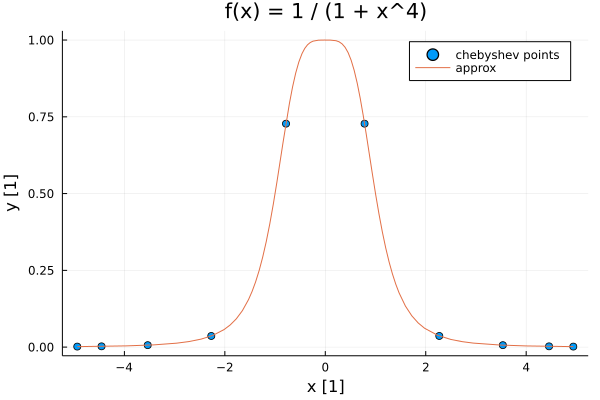

In [76]:
scatter(X_chebyshev, Y_chebyshev, label="chebyshev points", title="f(x) = 1 / (1 + x^4)", xlabel="x [1]", ylabel="y [1]")
plot!(f,  extrema(X_chebyshev)..., label="approx")

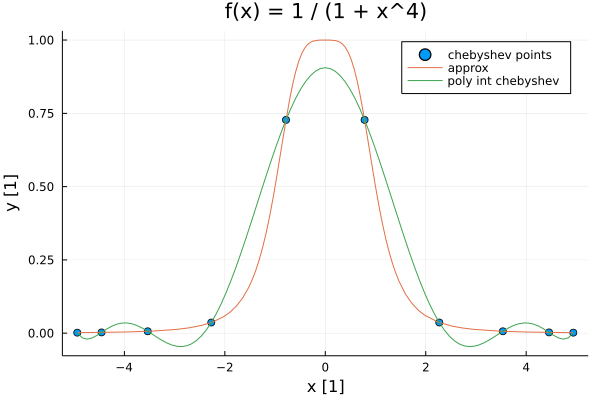

In [77]:
poly_fit_chebyshev = fit(X_chebyshev, Y_chebyshev)
plot!(poly_fit_chebyshev, extrema(X_chebyshev)..., label="poly int chebyshev")

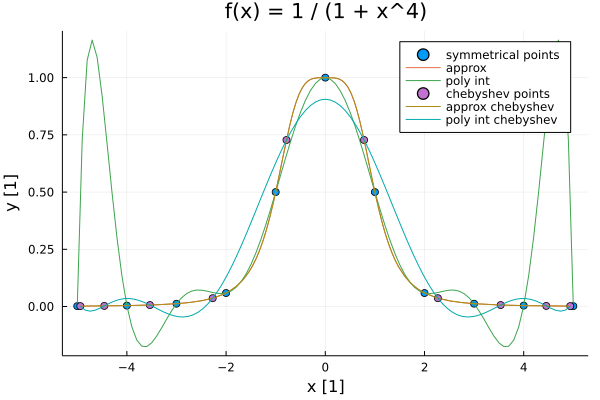

In [78]:
scatter(X, Y, label="symmetrical points", title="f(x) = 1 / (1 + x^4)", xlabel="x [1]", ylabel="y [1]")
plot!(f,  extrema(X)..., label="approx")
poly_fit = fit(X, Y)
plot!(poly_fit, extrema(X)..., label="poly int")
scatter!(X_chebyshev, Y_chebyshev, label="chebyshev points")
plot!(f,  extrema(X_chebyshev)..., label="approx chebyshev")
poly_fit_chebyshev = fit(X_chebyshev, Y_chebyshev)
plot!(poly_fit_chebyshev, extrema(X_chebyshev)..., label="poly int chebyshev")

## zad.5
Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze.

In [88]:
f(x) = log(1 + x) / x

f (generic function with 1 method)

In [120]:
taylor_base = Taylor1(Float64, 5)

 1.0 t + 𝒪(t⁶)

In [121]:
taylor_poly = Polynomial(f(taylor_base).coeffs)

Polynomial(1.0 - 0.5*x + 0.3333333333333333*x^2 - 0.25*x^3 + 0.2*x^4)

In [122]:
X = [x for x in 1.0:5.0]
pushfirst!(X, 0.01)
# Y = [f(x) for x in X]

6-element Vector{Float64}:
 0.01
 1.0
 2.0
 3.0
 4.0
 5.0

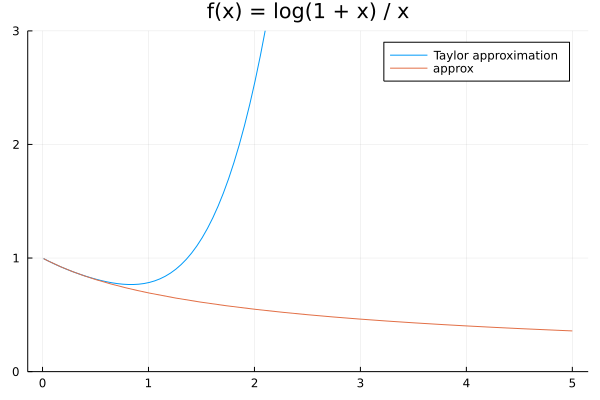

In [138]:
plot(taylor_poly, extrema(X)..., label="Taylor approximation", title="f(x) = log(1 + x) / x", ylims=(0, 3))
plot!(f, extrema(X)..., label="approx")

In [128]:
pade_object = Polynomials.PolyCompat.PadeApproximation.Pade(taylor_poly, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64, Float64}(Polynomial(1.0 + 0.6999999999999987*x + 0.03333333333333298*x^2), Polynomial(1.0 + 1.1999999999999986*x + 0.29999999999999905*x^2), :x)

In [130]:
pade_polynomial(x) = pade_object.p(x) / pade_object.q(x)

pade_polynomial (generic function with 1 method)

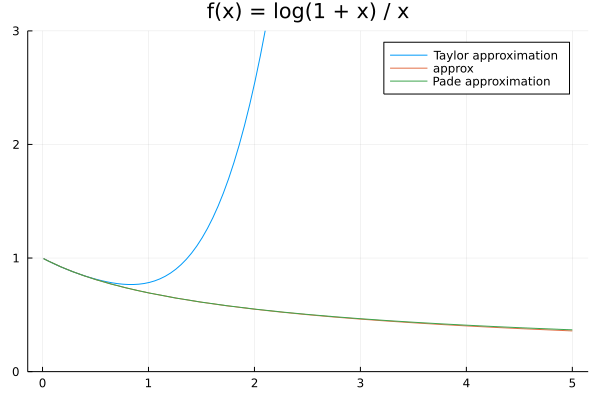

In [139]:
plot!(pade_polynomial, extrema(X)..., label="Pade approximation")